In this notebook, the data are visualized, analyzed, assembled and prepared in a proper manner to be feed into the model later on.
-  The data was obtained from this UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphone

- This notebook contains 2 section:
1. Engineered Features Data, which this data will be used in notebook 2, to be fed in the Machine Learning Model
2. Raw Inertial Signal Data, which will be used in notebook 3, to be fed in Deep Learning Model


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE


# Engineered Features Data 

Obtain feature names and activity labels 

In [51]:
feature =  "/home/neko/UCI HAR Dataset/UCI HAR Dataset/features.txt"
header = pd.read_csv(feature, sep=" ", header=None).T
header.tail(-1)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"


In [52]:
category = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt"
keys, val = [], []
with open(category, 'r') as f:
    for i in f.readlines():
        keys.append(int(i.split(' ')[0]))
        val.append(i.split(' ')[1][:-1])
# create a dictionary from the keys and values using zip()
my_dict = dict(zip(keys, val))
my_dict

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

Obtain Train Data

In [53]:
# Gather train data in a dataframe 

train_data = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
train_data = pd.read_fwf(train_data, header=None)

train_subject = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt"
train_subject = pd.read_csv(train_subject, header=None)

train_label = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
train_label = pd.read_csv(train_label, header=None)

train = pd.concat([header.tail(1), train_data], axis=0)
train.columns = train.iloc[0]
train = train.iloc[pd.RangeIndex(len(train)).drop(0)]
train['subject'] = train_subject
train['label'] = train_label
train['activity'] = train['label'].map(my_dict)
train.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,label,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.12352,-0.998245,-0.9753,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.99538,-0.967187,-0.978944,-0.99652,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.98275,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.01657,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.12332,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


check data shape

In [68]:
train.shape

(7352, 564)

Obtain Test Data

In [57]:
# Gather test data in a dataframe 

test_data = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt"
test_data = pd.read_fwf(test_data, header=None)

test_subject = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt"
test_subject = pd.read_csv(test_subject, header=None)

test_label = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt"
test_label = pd.read_csv(test_label, header=None)

test = pd.concat([header.tail(1), test_data], axis=0)
test.columns = test.iloc[0]
test = test.iloc[pd.RangeIndex(len(test)).drop(0)]
test['subject'] = test_subject
test['label'] = test_label
test['activity'] = test['label'].map(my_dict)
test.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,label,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.0175,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.02605,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.93926,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.11752,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.93861,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.93861,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


check test data shape

In [74]:
test.shape

(2947, 564)

### Data Cleaning

##### 1. Check for Duplicates

In [75]:
print(f'No of duplicates in train dataset: {sum(train.duplicated())}')
print(f'No of duplicates in test dataset: {sum(test.duplicated())}')

No of duplicates in train dataset: 0
No of duplicates in test dataset: 0


there's no duplicates in both train and test dataset, no further action needed

##### 2. Check for NaN/Null Values

In [76]:

print(f"There's {train.isnull().values.sum()} NaN/Null values in Train dataset")
print(f"There's {train.isnull().values.sum()} NaN/Null values in test dataset")

There's 0 NaN/Null values in Train dataset
There's 0 NaN/Null values in test dataset


there's no NaN/Null values in both train and test dataset, no further action needed

##### 3. Check for Data Imbalance

In [77]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

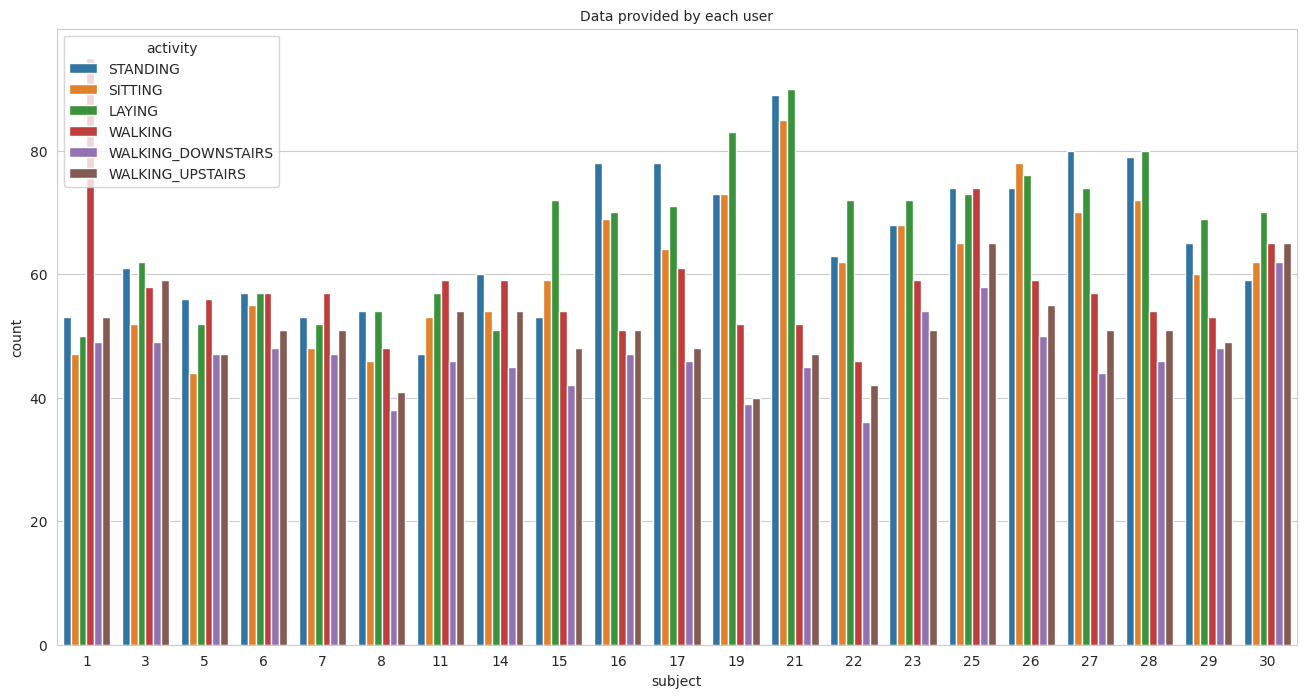

In [78]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=10)
sns.countplot(x='subject', hue='activity', data = train)
plt.show()

Distribution of the dataset seems quite balance, there is no significant difference in between the dataset 

<AxesSubplot: >

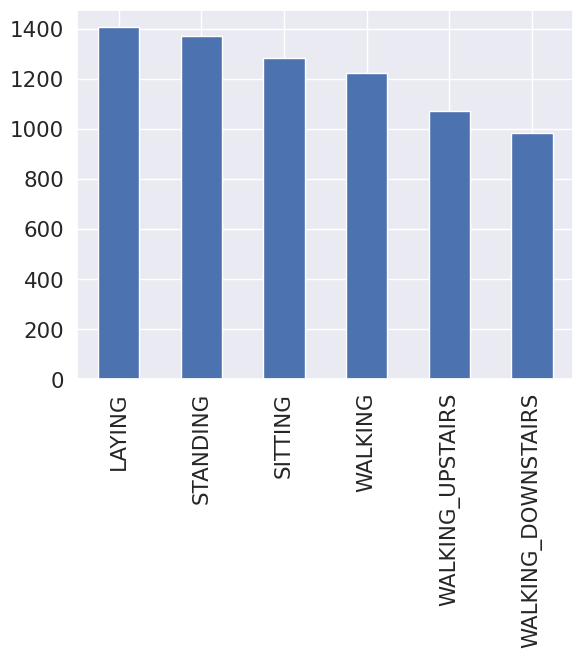

In [108]:
train['activity'].value_counts().plot(kind='bar')

Data points per activity is well balanced as well 

##### 4. Changing feature names

In [109]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

/tmp/ipykernel_2025/71913079.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
/tmp/ipykernel_2025/71913079.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
/tmp/ipykernel_2025/71913079.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'label', 'activity'],
      dtype='object', name=1, length=564)

cleaning the feature name

##### 5. Save dataframe in csv files

In [110]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

save the clean assembled data into a csv files to be use in notebook 2 later

### Exploratory Data Analysis

The dataset activities can be classify into 2 main movements; 
- Static movements (Sit, Stand, Lie Down); where this motion might not be very useful
- Dynamic movements (Walking, Walking Upstairs, Walking Downstairs); this motion info will be more significant

/home/neko/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/neko/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/

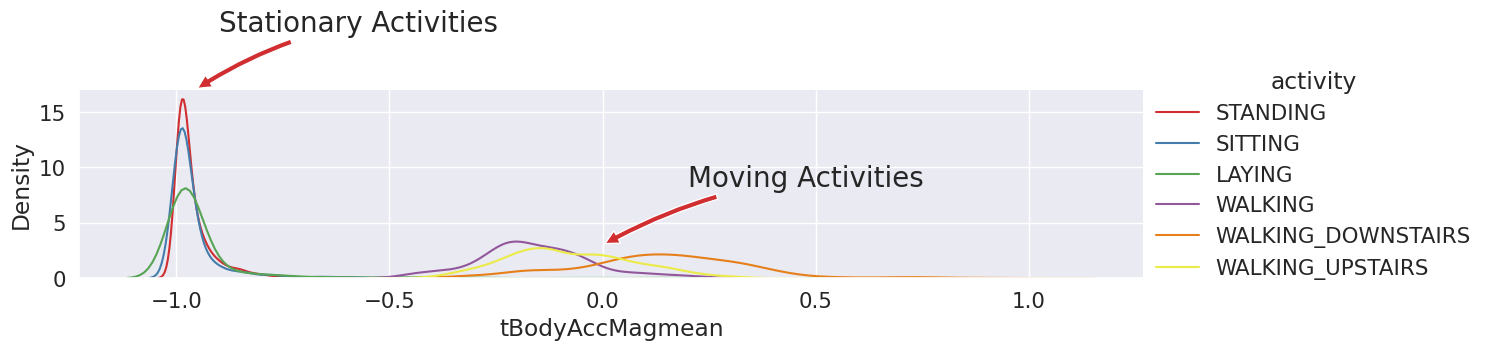

In [129]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='activity', aspect=4, margin_titles=False)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

We can see clearly in the graph above, the difference between Stationary Activities and Moving Activities

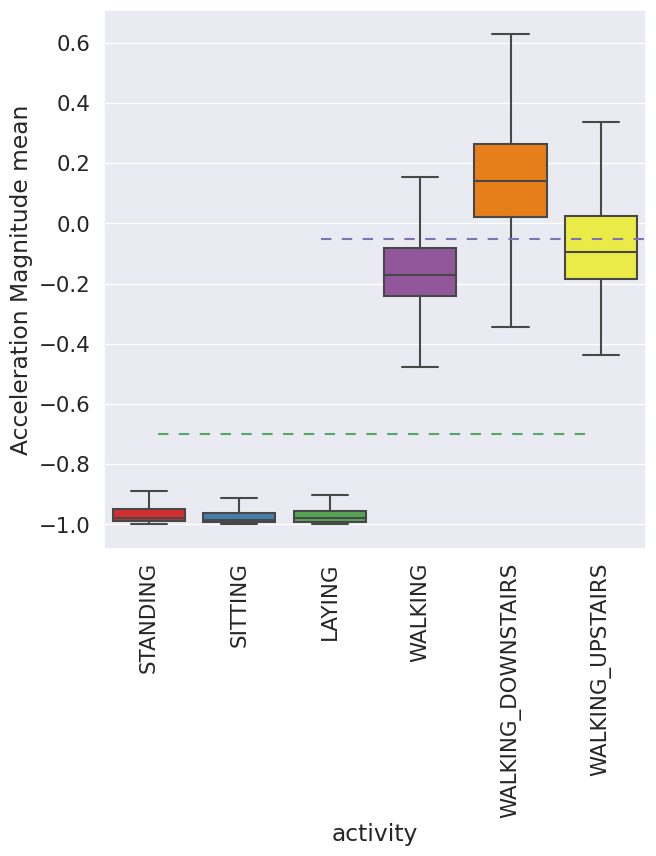

In [137]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Magnitude of Acceleration can seperate it well

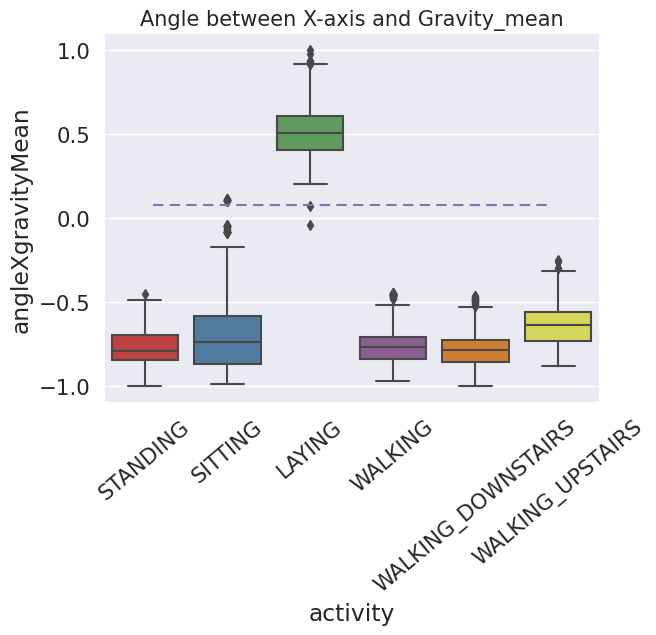

In [139]:
sns.boxplot(x='activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

While position of GravityAccelerationComponants is significant as well

### Feature Reduction

#### 1. Apply t-sne on the dataset

In [50]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

performs t-sne with different perplexity values and their respective plots


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...


/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 1.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961075
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 113.9859085, gradient norm = 0.0222362 (50 iterations in 0.621s)
[t-SNE] Iteration 100: error = 97.0020523, gradient norm = 0.0163636 (50 iterations in 0.569s)
[t-SNE] Iteration 150: error = 92.9560547, gradient norm = 0.0114419 (50 iterations in 0.458s)
[t-SNE] Iteration 200: error = 91.0751343, gradi

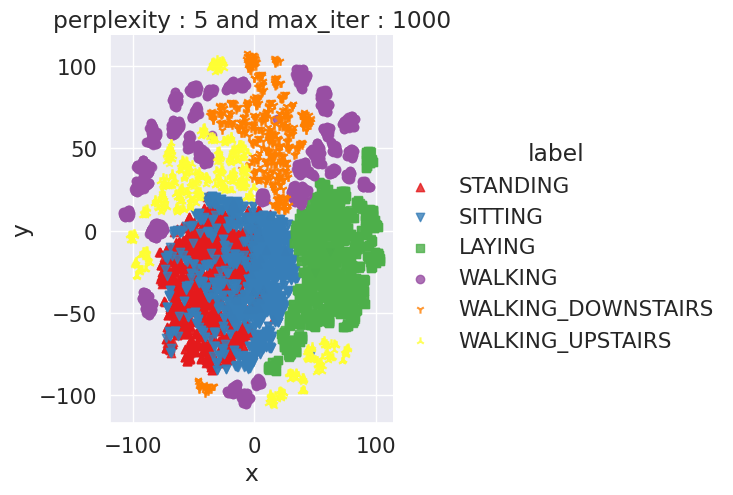

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...


/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 1.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133254
[t-SNE] Computed conditional probabilities in 0.039s
[t-SNE] Iteration 50: error = 105.7620010, gradient norm = 0.0208476 (50 iterations in 0.627s)
[t-SNE] Iteration 100: error = 90.5511017, gradient norm = 0.0117511 (50 iterations in 0.571s)
[t-SNE] Iteration 150: error = 87.4482193, gradient norm = 0.0069214 (50 iterations in 0.468s)
[t-SNE] Iteration 200: error = 86.1638565, gradi

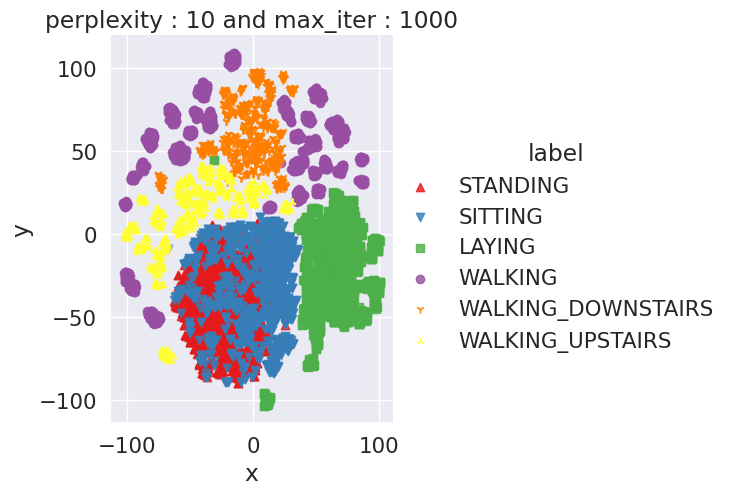

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...


/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/neko/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 0.995s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.273684
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 97.0299377, gradient norm = 0.0251677 (50 iterations in 0.775s)
[t-SNE] Iteration 100: error = 83.7455978, gradient norm = 0.0068573 (50 iterations in 0.698s)
[t-SNE] Iteration 150: error = 81.8161926, gradient norm = 0.0036962 (50 iterations in 0.676s)
[t-SNE] Iteration 200: error = 81.1050873, gradie

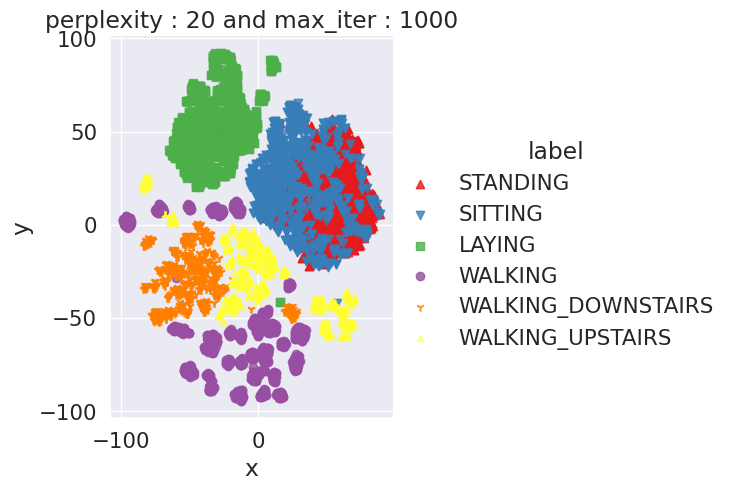

Done


In [145]:
X_pre_tsne = train.drop(['subject','label', 'activity'], axis=1)
y_pre_tsne = train['activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

We can see that all features except standing and seating can be seperated easily, this might affect model performance

# Raw Inertial Signal Data

Obtain train dataset and visualize the timeseries data to see if we can find distinguish pattern in the data. The data will be assembled in the 3rd Notebook

In [20]:
train_acc_x = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt",  header=None)
train_acc_y = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt",  header=None)
train_acc_z = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt",  header=None)

train_gyro_x = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt",  header=None)
train_gyro_y = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt",  header=None)
train_gyro_z = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt",  header=None)

train_t_acc_x = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt",  header=None)
train_t_acc_y = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt",  header=None)
train_t_acc_z = pd.read_fwf("/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt",  header=None)


train_subject = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt"
train_subject = pd.read_csv(train_subject, header=None)

train_label = "/home/neko/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
train_label = pd.read_csv(train_label, header=None)

In [25]:
train_acc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


body accelerometer

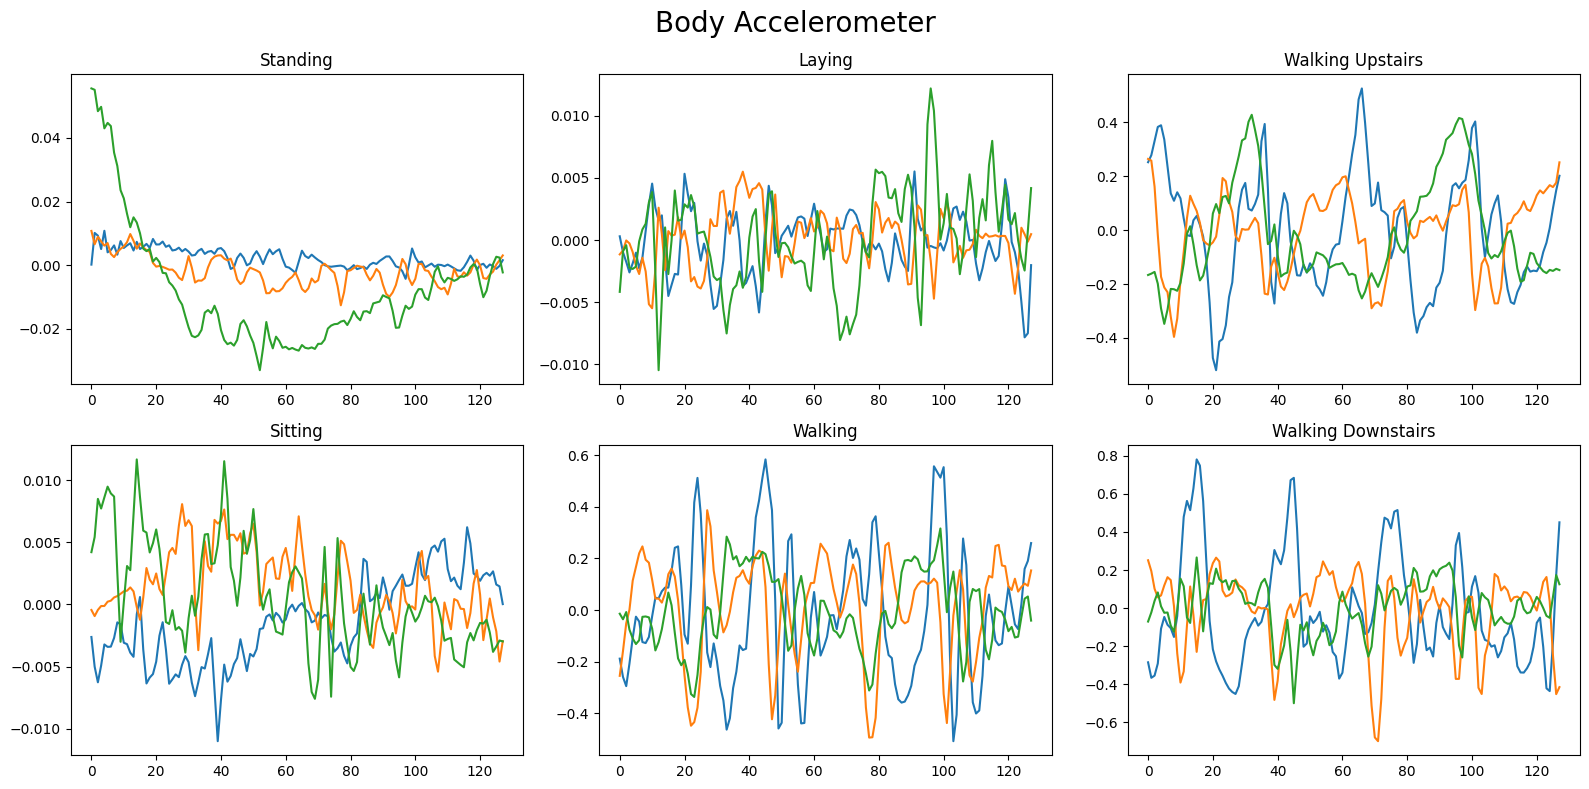

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Body Accelerometer', fontsize=20)

axs[0, 0].plot(train_acc_x.iloc[0])
axs[0, 0].plot(train_acc_y.iloc[0])
axs[0, 0].plot(train_acc_z.iloc[0])
axs[0, 0].set_title("Standing")

axs[1, 0].plot(train_acc_x.iloc[35])
axs[1, 0].plot(train_acc_y.iloc[35])
axs[1, 0].plot(train_acc_z.iloc[35])
axs[1, 0].set_title("Sitting")

axs[0, 1].plot(train_acc_x.iloc[55])
axs[0, 1].plot(train_acc_y.iloc[55])
axs[0, 1].plot(train_acc_z.iloc[55])
axs[0, 1].set_title("Laying")

axs[1, 1].plot(train_acc_x.iloc[94])
axs[1, 1].plot(train_acc_y.iloc[94])
axs[1, 1].plot(train_acc_z.iloc[94])
axs[1, 1].set_title("Walking")

axs[0, 2].plot(train_acc_x.iloc[157])
axs[0, 2].plot(train_acc_y.iloc[157])
axs[0, 2].plot(train_acc_z.iloc[157])
axs[0, 2].set_title("Walking Upstairs")

axs[1, 2].plot(train_acc_x.iloc[335])
axs[1, 2].plot(train_acc_y.iloc[335])
axs[1, 2].plot(train_acc_z.iloc[335])
axs[1, 2].set_title("Walking Downstairs")

fig.tight_layout()

body gyroscope

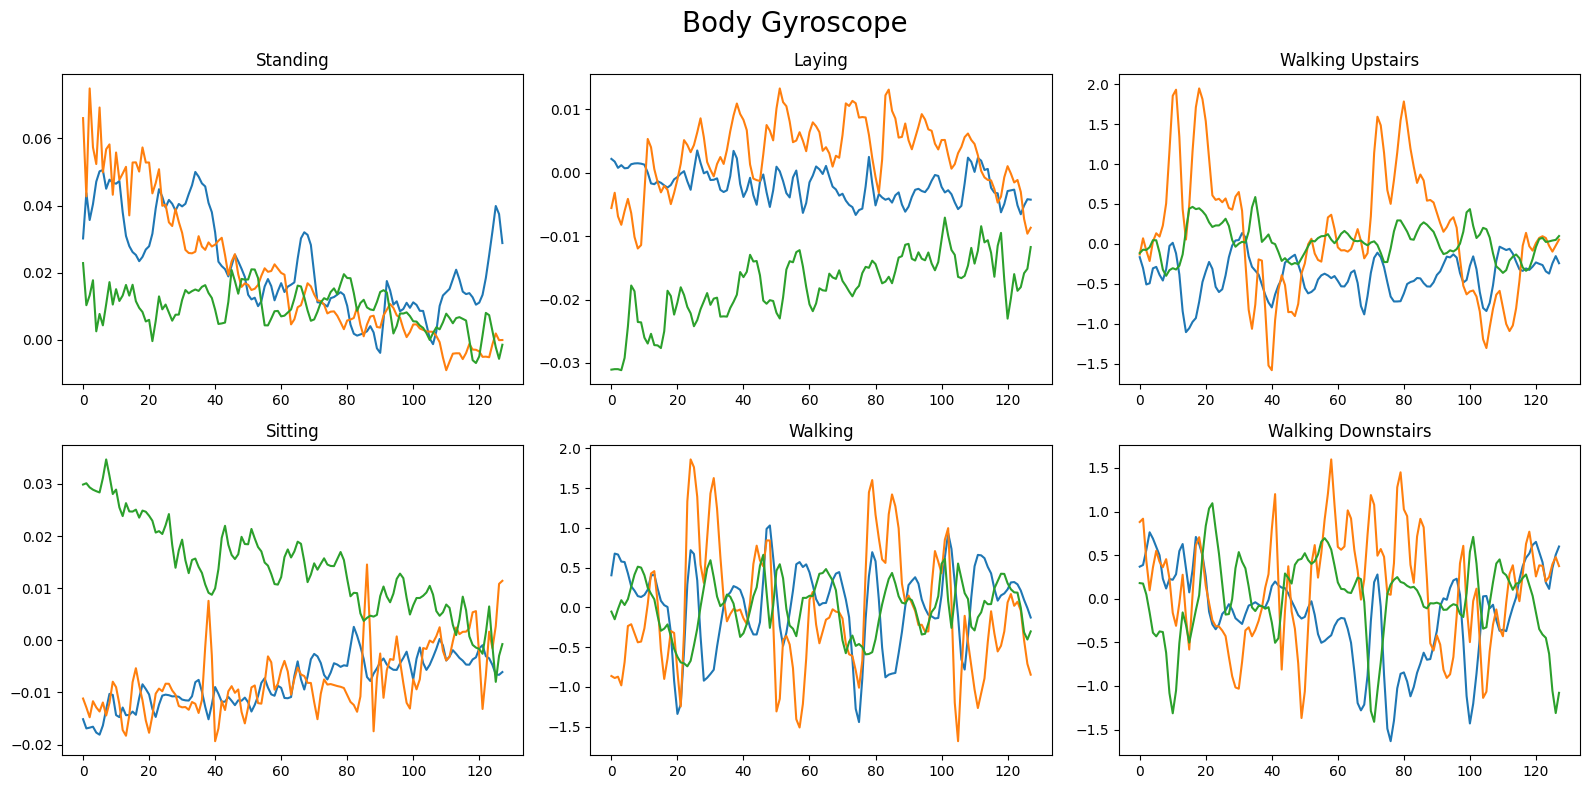

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Body Gyroscope', fontsize=20)

axs[0, 0].plot(train_gyro_x.iloc[0])
axs[0, 0].plot(train_gyro_y.iloc[0])
axs[0, 0].plot(train_gyro_z.iloc[0])
axs[0, 0].set_title("Standing")

axs[1, 0].plot(train_gyro_x.iloc[35])
axs[1, 0].plot(train_gyro_y.iloc[35])
axs[1, 0].plot(train_gyro_z.iloc[35])
axs[1, 0].set_title("Sitting")

axs[0, 1].plot(train_gyro_x.iloc[55])
axs[0, 1].plot(train_gyro_y.iloc[55])
axs[0, 1].plot(train_gyro_z.iloc[55])
axs[0, 1].set_title("Laying")

axs[1, 1].plot(train_gyro_x.iloc[94])
axs[1, 1].plot(train_gyro_y.iloc[94])
axs[1, 1].plot(train_gyro_z.iloc[94])
axs[1, 1].set_title("Walking")

axs[0, 2].plot(train_gyro_x.iloc[157])
axs[0, 2].plot(train_gyro_y.iloc[157])
axs[0, 2].plot(train_gyro_z.iloc[157])
axs[0, 2].set_title("Walking Upstairs")

axs[1, 2].plot(train_gyro_x.iloc[335])
axs[1, 2].plot(train_gyro_y.iloc[335])
axs[1, 2].plot(train_gyro_z.iloc[335])
axs[1, 2].set_title("Walking Downstairs")

fig.tight_layout()

total accelerometer

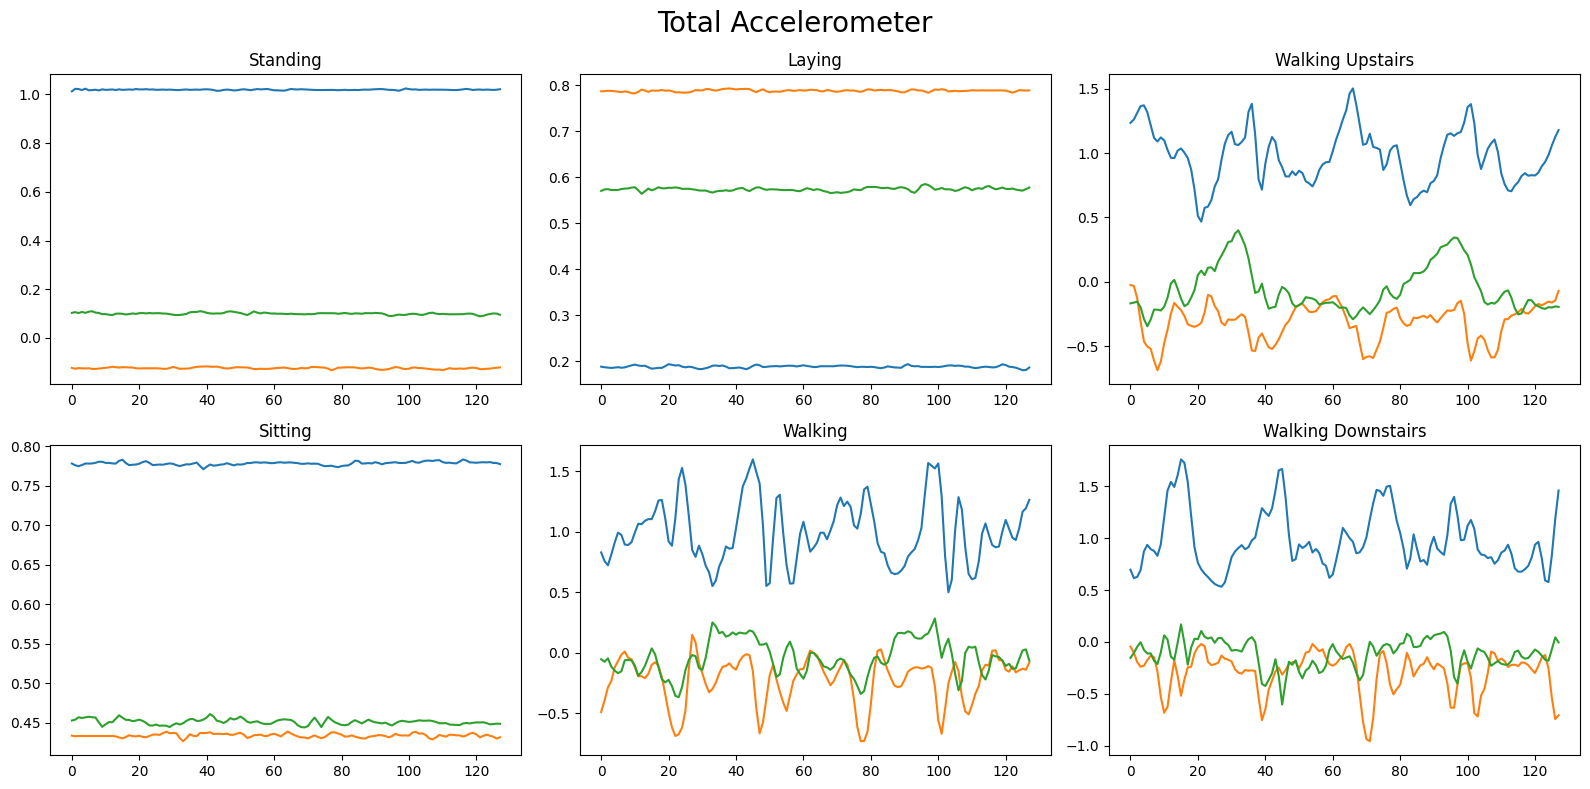

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Total Accelerometer', fontsize=20)

axs[0, 0].plot(train_t_acc_x.iloc[0])
axs[0, 0].plot(train_t_acc_y.iloc[0])
axs[0, 0].plot(train_t_acc_z.iloc[0])
axs[0, 0].set_title("Standing")

axs[1, 0].plot(train_t_acc_x.iloc[35])
axs[1, 0].plot(train_t_acc_y.iloc[35])
axs[1, 0].plot(train_t_acc_z.iloc[35])
axs[1, 0].set_title("Sitting")

axs[0, 1].plot(train_t_acc_x.iloc[55])
axs[0, 1].plot(train_t_acc_y.iloc[55])
axs[0, 1].plot(train_t_acc_z.iloc[55])
axs[0, 1].set_title("Laying")

axs[1, 1].plot(train_t_acc_x.iloc[94])
axs[1, 1].plot(train_t_acc_y.iloc[94])
axs[1, 1].plot(train_t_acc_z.iloc[94])
axs[1, 1].set_title("Walking")

axs[0, 2].plot(train_t_acc_x.iloc[157])
axs[0, 2].plot(train_t_acc_y.iloc[157])
axs[0, 2].plot(train_t_acc_z.iloc[157])
axs[0, 2].set_title("Walking Upstairs")

axs[1, 2].plot(train_t_acc_x.iloc[335])
axs[1, 2].plot(train_t_acc_y.iloc[335])
axs[1, 2].plot(train_t_acc_z.iloc[335])
axs[1, 2].set_title("Walking Downstairs")

fig.tight_layout()